In [1]:
texts = ""

with open("dataset.txt") as f:
    text = f.read()
    texts = text.split("===")

len(texts)

21

In [5]:
import spacy
import numpy as np

In [6]:
def extract_embedding(text: str, nlp: spacy.Language) -> np.ndarray:
    doc = nlp(text)
    return doc.vector

In [9]:
import spacy
nlp = nlp = spacy.load("es_core_news_md")

embeddings = np.array([extract_embedding(text, nlp) for text in texts])
embeddings[:4, :]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.3273162 ,  1.5200479 ,  0.17679612, ...,  0.940785  ,
        -0.1933065 ,  0.2717594 ],
       [ 1.4438628 ,  1.1611905 ,  0.13034157, ...,  0.9802628 ,
        -0.14771098,  0.15006183],
       [ 1.1449124 ,  1.0937364 , -0.45024955, ...,  0.972042  ,
        -0.3467593 ,  0.24556705]], dtype=float32)

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [11]:
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)
embeddings_3d.shape

(21, 3)

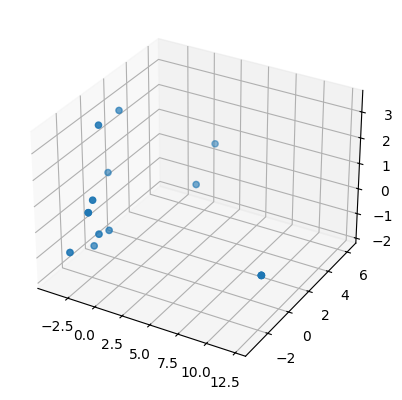

In [12]:
fig = plt.figure()

ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    embeddings_3d[:, 0],
    embeddings_3d[:, 1],
    embeddings_3d[:, 2],
)

In [ ]:
farandula = 5
politica = 6
deportes = 15

In [13]:
pca2 = PCA(n_components=2)
embeddings_2d = pca2.fit_transform(embeddings)

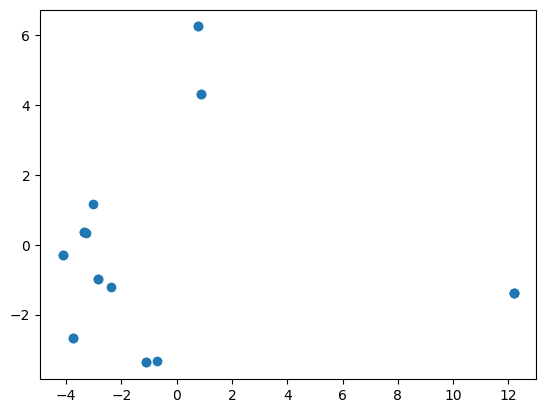

In [14]:
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1])